In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets

In [5]:
data = datasets.load_boston()

In [6]:
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
print data.feature_names
print data.data[0]
print data.target[0]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


In [8]:
type(data)

sklearn.datasets.base.Bunch

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()
print targets.head()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [12]:
#explore a little before running a regression
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [13]:
#explore
targets['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [14]:
targets.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [15]:
import statsmodels.api as sm

In [16]:
X = df["RM"]
y = targets["MEDV"]

In [17]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()

In [18]:
#model.tab shows all you can do with data model
model

In [19]:
predictions = model.predict(X)

In [21]:
predictions

array([ 24.02077888,  23.45816292,  26.24932262,  25.5661461 ,
        26.11049531,  23.49104307,  21.9639426 ,  22.54847867,
        20.5720161 ,  21.9347158 ,  23.2974155 ,  21.95298255,
        21.51458051,  21.73378153,  22.27082404,  21.31364623,
        21.68263462,  21.8835689 ,  19.93267978,  20.92273774,
        20.34916173,  21.79223514,  22.43887816,  21.23692588,
        21.64244777,  20.45510889,  21.23692588,  22.09180987,
        23.72851085,  24.38246057,  20.87159084,  22.18314363,
        21.73743488,  20.82775063,  22.27082404,  21.67532792,
        21.33921969,  21.37209984,  21.79588849,  24.09384589,
        25.66113321,  24.73318221,  22.53751862,  22.69095933,
        22.17218358,  20.75833697,  21.13828541,  22.02970291,
        19.72443881,  20.46606894,  21.78492844,  22.3402377 ,
        23.78696445,  21.9127957 ,  21.51092716,  26.48313705,
        23.3193356 ,  24.90123633,  22.44983821,  21.65340782,
        20.97388465,  21.79588849,  23.58603018,  24.70

In [22]:
#what if house has 4 rooms?
model.predict([4])

array([ 14.6134016])

In [23]:
#shows info about our model
#Here the coefficient of 3.634 
#means that as the RM variable increases by 1, 
#the predicted value of MDEV increases by 3.634
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          3.74e-256
Time:                        15:00:21   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

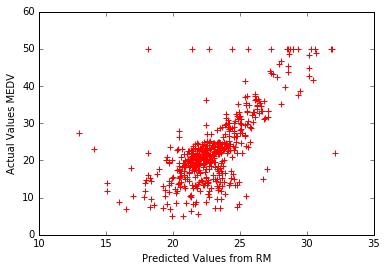

MSE: 270070.558471


In [25]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
#mean square error, how far off predicitons are
print "MSE:", model.mse_model

In [28]:
#tells you how to customize scatter plot
plt.scatter?

In [31]:
## With a constant
X = df["RM"]
X = sm.add_constant(X)
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [34]:
# Note the difference in argument order
y = targets["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:15:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

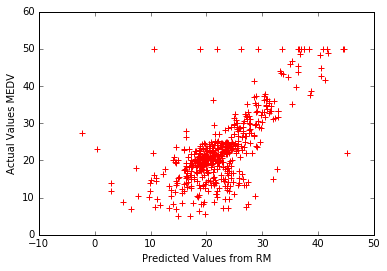

MSE: 20654.4162188


In [35]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [36]:
model.predict([1,0])

array([-34.67062078])

In [37]:
#with a house containing 4 rooms you will have a low house value
model.predict([1,4])

array([ 1.73781515])

In [40]:
X = df[["LSTAT"]]
y = targets["MEDV"]
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [41]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
#a 1 unit increase in LSTAT will increase house value by 1.12 (coefficient)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     410.9
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.71e-67
Time:                        15:21:40   Log-Likelihood:                -2182.4
No. Observations:                 506   AIC:                             4367.
Df Residuals:                     505   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT          1.1221      0.055     20.271      0.000         1.013     1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

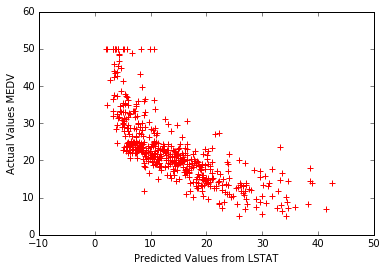

MSE: 134427.133958


In [42]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model
#bad model, not very predictive

In [43]:
X = df[["RM", "LSTAT"]]
y = targets["MEDV"]
X.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [44]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()
#predict 1 unit change RM = 4.9 unit increase in home value MEDV

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:24:24   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000         4.769     5.045
LSTAT         -0.6557      0.031    -21.458      0.000        -0.716    -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

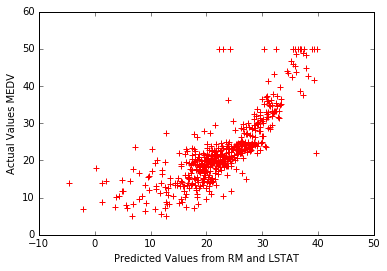

MSE: 142090.70278


In [45]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [46]:
X = df[["RM", "LSTAT"]]
X= sm.add_constant(X)
y = targets["MEDV"]
X.head()

,const,RM,LSTAT
0,1,6.575,4.98
1,1,6.421,9.14
2,1,7.185,4.03
3,1,6.998,2.94
4,1,7.147,5.33


In [47]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          7.01e-112
Time:                        15:28:27   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669        -7.592     4.875
RM             5.0948      0.444     11.463      0.000         4.222     5.968
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X = df
X= sm.add_constant(X)
y = targets["MEDV"]
X.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          6.95e-135
Time:                        15:33:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

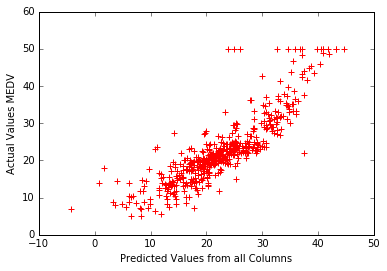

MSE: 2433.53993314


In [56]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all Columns")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

mean squared error:higher means pts on avg are further away from where reality lies.
bigger mse compared to another model suggests less predictive

In [57]:
import patsy

In [59]:
# First let's add the targets to our data frame
df["MEDV"] = targets["MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
y, X = patsy.dmatrices("MEDV ~ RM + LSTAT", data=df)

In [62]:
print X[0:5, :]

[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     7.185  4.03 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]]


In [63]:
print y[0:5, :]

[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [64]:
y, X = patsy.dmatrices("MEDV ~ LSTAT + I(LSTAT**2)", data=df)
print X[0:5, :]

[[  1.       4.98    24.8004]
 [  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]]


In [65]:
y, X = patsy.dmatrices("MEDV ~ LSTAT + np.power(LSTAT,2)", data=df)
print X[0:5, :]

[[  1.       4.98    24.8004]
 [  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]]


In [66]:
from patsy import dmatrix, demo_data

data = demo_data("a", nlevels=4)
print data
dmatrix("a", data)

{'a': ['a1', 'a2', 'a3', 'a4', 'a1', 'a2', 'a3', 'a4']}


DesignMatrix with shape (8, 4)
  Intercept  a[T.a2]  a[T.a3]  a[T.a4]
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
  Terms:
    'Intercept' (column 0)
    'a' (columns 1:4)

In [68]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [71]:
y, X = patsy.dmatrices("MEDV ~ CRIM + INDUS", data=df)

In [72]:
crime_indus_model = sm.OLS(y, X).fit()

In [73]:
predictions_crim = crime_indus_model.predict(X)

In [74]:
crime_indus_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     96.47
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.45e-36
Time:                        16:11:50   Log-Likelihood:                -1758.1
No. Observations:                 506   AIC:                             3522.
Df Residuals:                     503   BIC:                             3535.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     29.2560      0.671     43.618      0.000        27.938    30.574
CRIM          -0.2433      0.044     -5.486      0.000        -0.330    -0.156
INDUS         -0.5252      0.056     -9.452      0.000        -0.634    -0.416
==============================================================================
Omnibus:                      193.507   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.456
Skew:                           1.798   Prob(JB):                    2.09e-142
Kurtosis:                       7.244   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

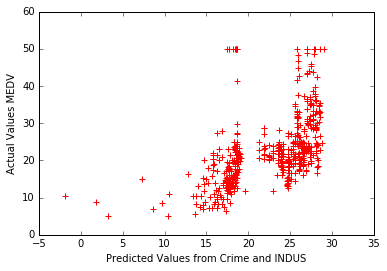

MSE: 5921.17051979


In [76]:
# Plot the model
plt.scatter(predictions_crim, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Crime and INDUS")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crime_indus_model.mse_model

In [77]:
y, X = patsy.dmatrices("MEDV ~ AGE + CHAS", data=df)

In [79]:
age_chas_model = sm.OLS(y, X).fit()

In [81]:
predictions_age = age_chas_model.predict(X)

In [82]:
age_chas_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     57.33
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           3.73e-23
Time:                        16:21:11   Log-Likelihood:                -1788.3
No. Observations:                 506   AIC:                             3583.
Df Residuals:                     503   BIC:                             3595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     30.8601      0.975     31.662      0.000        28.945    32.775
AGE           -0.1291      0.013     -9.782      0.000        -0.155    -0.103
CHAS           7.5838      1.462      5.186      0.000         4.711    10.457
==============================================================================
Omnibus:                      161.230   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.990
Skew:                           1.612   Prob(JB):                     4.20e-89
Kurtosis:                       5.984   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

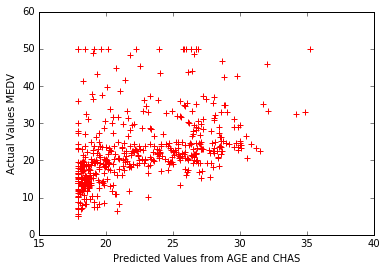

MSE: 3964.75577486


In [83]:
# Plot the model
plt.scatter(predictions_age, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from AGE and CHAS")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", age_chas_model.mse_model

In [ ]:
#a guide start to finish for patsy linear regressions

y, X = patsy.dmatrices("MEDV ~ CRIM + INDUS", data=df)
crime_indus_model = sm.OLS(y, X).fit()
predictions_crim = crime_indus_model.predict(X)
crime_indus_model.summary()

# Plot the model
plt.scatter(predictions_crim, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Crime and INDUS")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crime_indus_model.mse_model


In [88]:
y,x = patsy.dmatrices('MEDV ~ NOX', data=df)
nitric_oxides_model = sm.OLS(y,x).fit()
predict_nitric = nitric_oxides_model.predict(x)
nitric_oxides_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           7.07e-24
Time:                        16:37:15   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     41.3459      1.811     22.828      0.000        37.787    44.904
NOX          -33.9161      3.196    -10.611      0.000       -40.196   -27.636
==============================================================================
Omnibus:                      165.520   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.900
Skew:                           1.641   Prob(JB):                     2.70e-94
Kurtosis:                       6.109   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

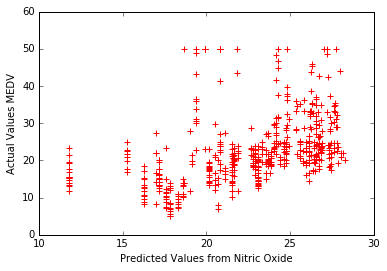

MSE: 7800.12550718


In [91]:
plt.scatter(predict_nitric, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Nitric Oxide")
plt.ylabel('Actual Values MEDV')
plt.show()
print 'MSE:', nitric_oxides_model.mse_model

In [89]:
#goes through all the graphs to easily compare sme
l = list(data.feature_names)
l2 = []
for i in range(0, len(l)):
   for j in range(0, len(l)):
       if i > j:
           l2.append(str(l[j])+" + "+str(l[i]))
for i in range(0, len(l2)):
   y, x = patsy.dmatrices("MEDV ~ "+l2[i], data=df)
   model = sm.OLS(y, x).fit()
   predictions = model.predict(x)
   model.summary()
   plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
   plt.xlabel("Predicted Values from " + l2[i])
   plt.ylabel("Actual Values MEDV")
   plt.show()
   print "MSE:", model.mse_model

AttributeError: 'dict' object has no attribute 'feature_names'